In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
%matplotlib inline

In [2]:
# gpu_device = tf.config.experimental.list_physical_devices('GPU')
# print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)

## Loading data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image at index: #116 -> Digit: 9


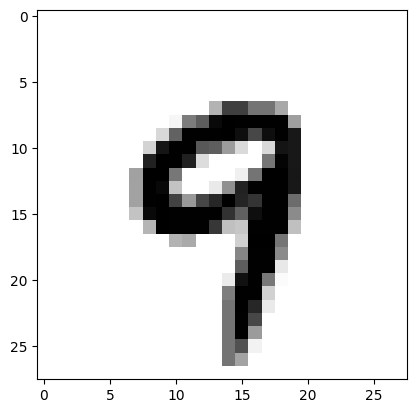

In [4]:
idx = np.random.randint(0,6000)
a = x_train[idx]
plt.imshow(a, cmap='gray_r')
print(f"Image at index: #{idx} -> Digit: {y_train[idx]}")

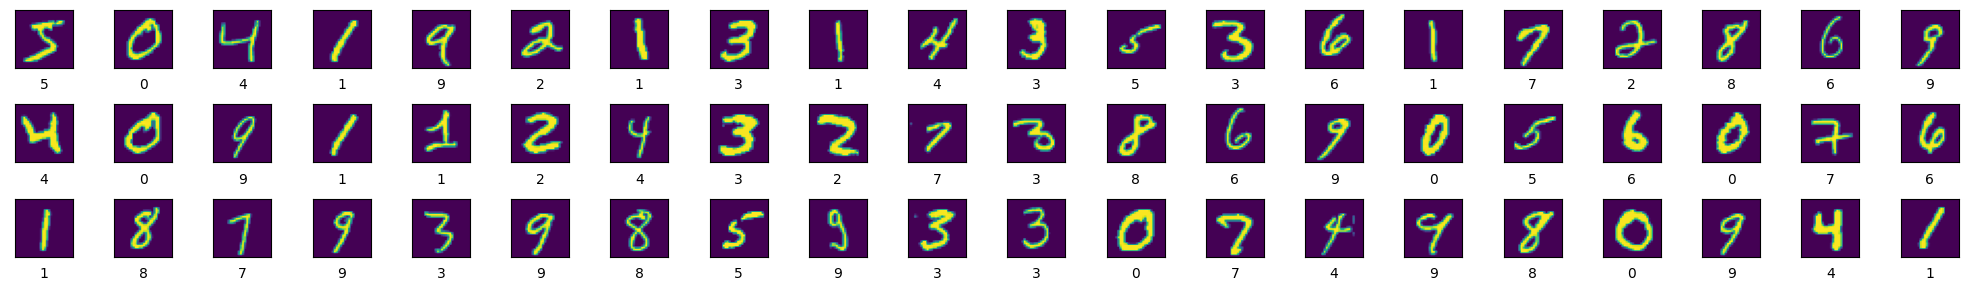

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i])
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 


In [6]:
x_train = x_train.reshape(-1, 28*28).astype('float32')/255.0
x_test = x_test.reshape(-1, 28*28).astype('float32')/255.0

In [7]:
x_train.shape

(60000, 784)

Image at index: #4176 -> Digit: 8


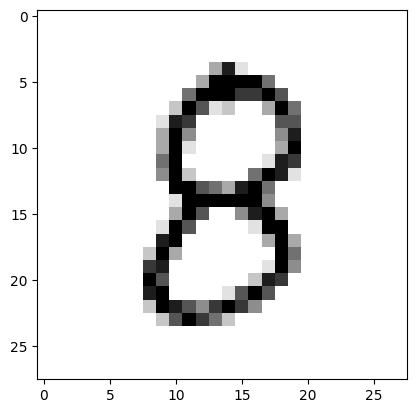

In [8]:
idx = np.random.randint(0,6000)
a = x_train[idx].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image at index: #{idx} -> Digit: {y_train[idx]}")

# Model

In [9]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units= 256, activation = 'relu'),
    layers.Dense(units= 128, activation = 'relu'),
    layers.Dense(units= 10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Epoch 1/25
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2403 - accuracy: 0.9283 - val_loss: 0.1511 - val_accuracy: 0.9539
Epoch 2/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0991 - accuracy: 0.9692 - val_loss: 0.1096 - val_accuracy: 0.9670
Epoch 3/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.1048 - val_accuracy: 0.9693
Epoch 4/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0498 - accuracy: 0.9838 - val_loss: 0.1022 - val_accuracy: 0.9701
Epoch 5/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.1208 - val_accuracy: 0.9666
Epoch 6/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.1167 - val_accuracy: 0.9708
Epoch 7/25
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1180 - val_accuracy:

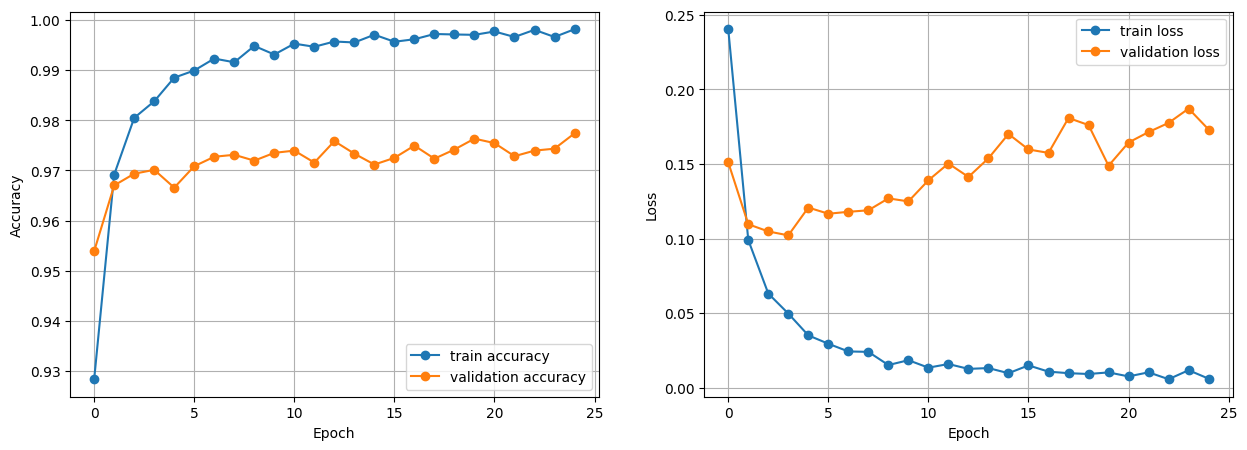

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=25, batch_size=32, validation_split=0.3)

print("#"*30)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()